## <div align="center"> LAB IS794 Deep Learning </div>
## <div align="center"> GROUP 06: PENGEMBANGAN MODEL DEEP LEARNING UNTUK MENDETEKSI SPAM EMAIL</div>
#### <div align="center"> Odd Semester 2025/2026 </div>
---

In [1]:
import datetime
import uuid

In [2]:
import datetime
import uuid

student1 = "Nikolas Lyen Agung - 00000098199"
student2 = "Jonathan Candra - 00000094067"
student3 = "Darren Chikal Setiawan - 00000081930"
student4 = "Alvin Clarence - 00000098317"
student5 = "Johanes Sebastian W.A - 00000098319"

---

### Enter Code Here:

1. IMPORT LIBRARIES

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,Embedding,Dropout,LSTM,Bidirectional,GRU,Conv1D,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud


2. LOAD THE DATA

In [4]:
from google.colab import files
uploaded = files.upload()
df_csv = pd.read_csv('Dataset_Email.csv')

Saving Dataset_Email.csv to Dataset_Email.csv


In [5]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sender       2747 non-null   object
 1   receiver     2666 non-null   object
 2   date         2747 non-null   object
 3   subject      2747 non-null   object
 4   body         2747 non-null   object
 5   label        2747 non-null   int64 
 6   urls         2747 non-null   int64 
 7   source       2747 non-null   object
 8   file_source  2747 non-null   object
dtypes: int64(2), object(7)
memory usage: 193.3+ KB


3. Print 5 data awal

In [6]:
print(df_csv.head(5))

                                              sender  \
0                    vcqztr_2gk1525@deutsche-bank.de   
1             K1-Sexkontaktmagazin <news@k1-web.com>   
2                                      IA@rogers.com   
3  Reports You Need To Make Cash! <John@ABigClick...   
4  "zzzz-latestdodgydotcomstock" <jm-latestdodgyd...   

                                            receiver  \
0                                    <ilug@linux.ie>   
1                                   <ler@lerctr.org>   
2                        Internet.Access@webnote.net   
3  Reports You Need To Make Cash! <jjbaxter2453@a...   
4  "zzzz-latestdodgydotcomstock" <jm-latestdodgyd...   

                                           date  \
0                 Sat,7 Sep 2002 11:48:19 +0100   
1                Tue,03 Sep 2002 21:41:16 +0100   
2                Mon,26 Aug 2002 05:48:48 -1000   
3                Fri,19 Jul 2002 03:28:09 -0400   
4  Fri,30 Aug 02 21:48:08 Eastern Daylight Time   

                   

Dataset Overview

In [7]:
print("\nDATASET OVERVIEW:")
print(f"Total Emails: {len(df_csv)}")
print(f"Total Features: {len(df_csv.columns)}")
print(f"Features: {', '.join(df_csv.columns)}")
print("\nMissing Values per Column:")
print(df_csv.isnull().sum())


DATASET OVERVIEW:
Total Emails: 2747
Total Features: 9
Features: sender, receiver, date, subject, body, label, urls, source, file_source

Missing Values per Column:
sender          0
receiver       81
date            0
subject         0
body            0
label           0
urls            0
source          0
file_source     0
dtype: int64


Label Distribution - PIE & BAR CHART

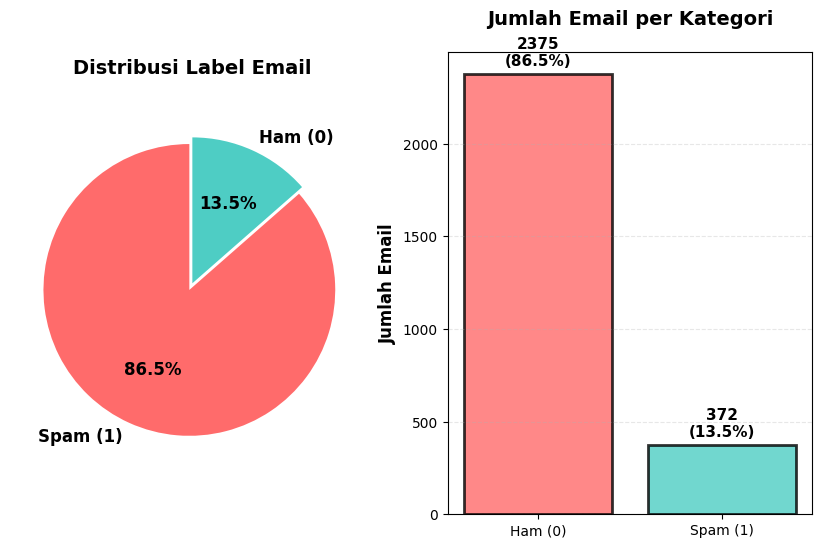

In [8]:
fig = plt.figure(figsize=(16, 6))

# Pie Chart
ax1 = plt.subplot(1, 3, 1)
label_counts = df_csv['label'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
explode = (0.05, 0)
wedges, texts, autotexts = ax1.pie(
    label_counts,
    labels=['Spam (1)', 'Ham (0)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'weight': 'bold'}
)
ax1.set_title('Distribusi Label Email', fontsize=14, weight='bold', pad=20)

# Bar Chart dengan nilai
ax2 = plt.subplot(1, 3, 2)
bars = ax2.bar(
    ['Ham (0)', 'Spam (1)'],
    label_counts.values,
    color=colors,
    edgecolor='black',
    linewidth=2,
    alpha=0.8
)
ax2.set_title('Jumlah Email per Kategori', fontsize=14, weight='bold', pad=20)
ax2.set_ylabel('Jumlah Email', fontsize=12, weight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
for i, (bar, v) in enumerate(zip(bars, label_counts.values)):
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        v + 30,
        f'{v}\n({v/len(df_csv)*100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )




Percentage Bar

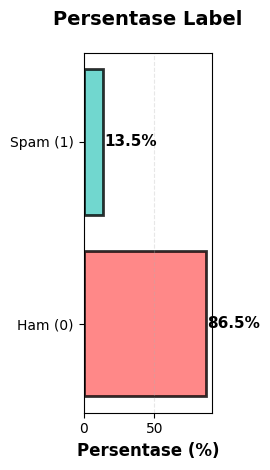

In [9]:
# Percentage Bar
ax3 = plt.subplot(1, 3, 3)
percentages = (label_counts / len(df_csv) * 100).values
bars2 = ax3.barh(
    ['Ham (0)', 'Spam (1)'],
    percentages,
    color=colors,
    edgecolor='black',
    linewidth=2,
    alpha=0.8
)
ax3.set_title('Persentase Label', fontsize=14, weight='bold', pad=20)
ax3.set_xlabel('Persentase (%)', fontsize=12, weight='bold')
ax3.grid(axis='x', alpha=0.3, linestyle='--')
for i, (bar, p) in enumerate(zip(bars2, percentages)):
    ax3.text(
        p + 1,
        bar.get_y() + bar.get_height()/2,
        f'{p:.1f}%',
        ha='left',
        va='center',
        fontsize=11,
        weight='bold'
    )

plt.tight_layout()
plt.show()



Text Length Analysis


TEXT LENGTH ANALYSIS:
      text_length                                                              \
            count        mean         std   min    25%    50%     75%     max   
label                                                                           
0          2375.0  449.833684  494.031744  10.0   61.0  222.0   676.0  1500.0   
1           372.0  800.634409  541.891517  10.0  262.0  752.0  1500.0  1500.0   

      word_count                                                         
           count        mean        std  min   25%    50%    75%    max  
label                                                                    
0         2375.0   64.792842  75.587634  1.0   8.0   29.0   94.0  297.0  
1          372.0  122.975806  93.701205  1.0  25.0  109.5  215.0  301.0  


/tmp/ipython-input-1564435261.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0, 2].boxplot(


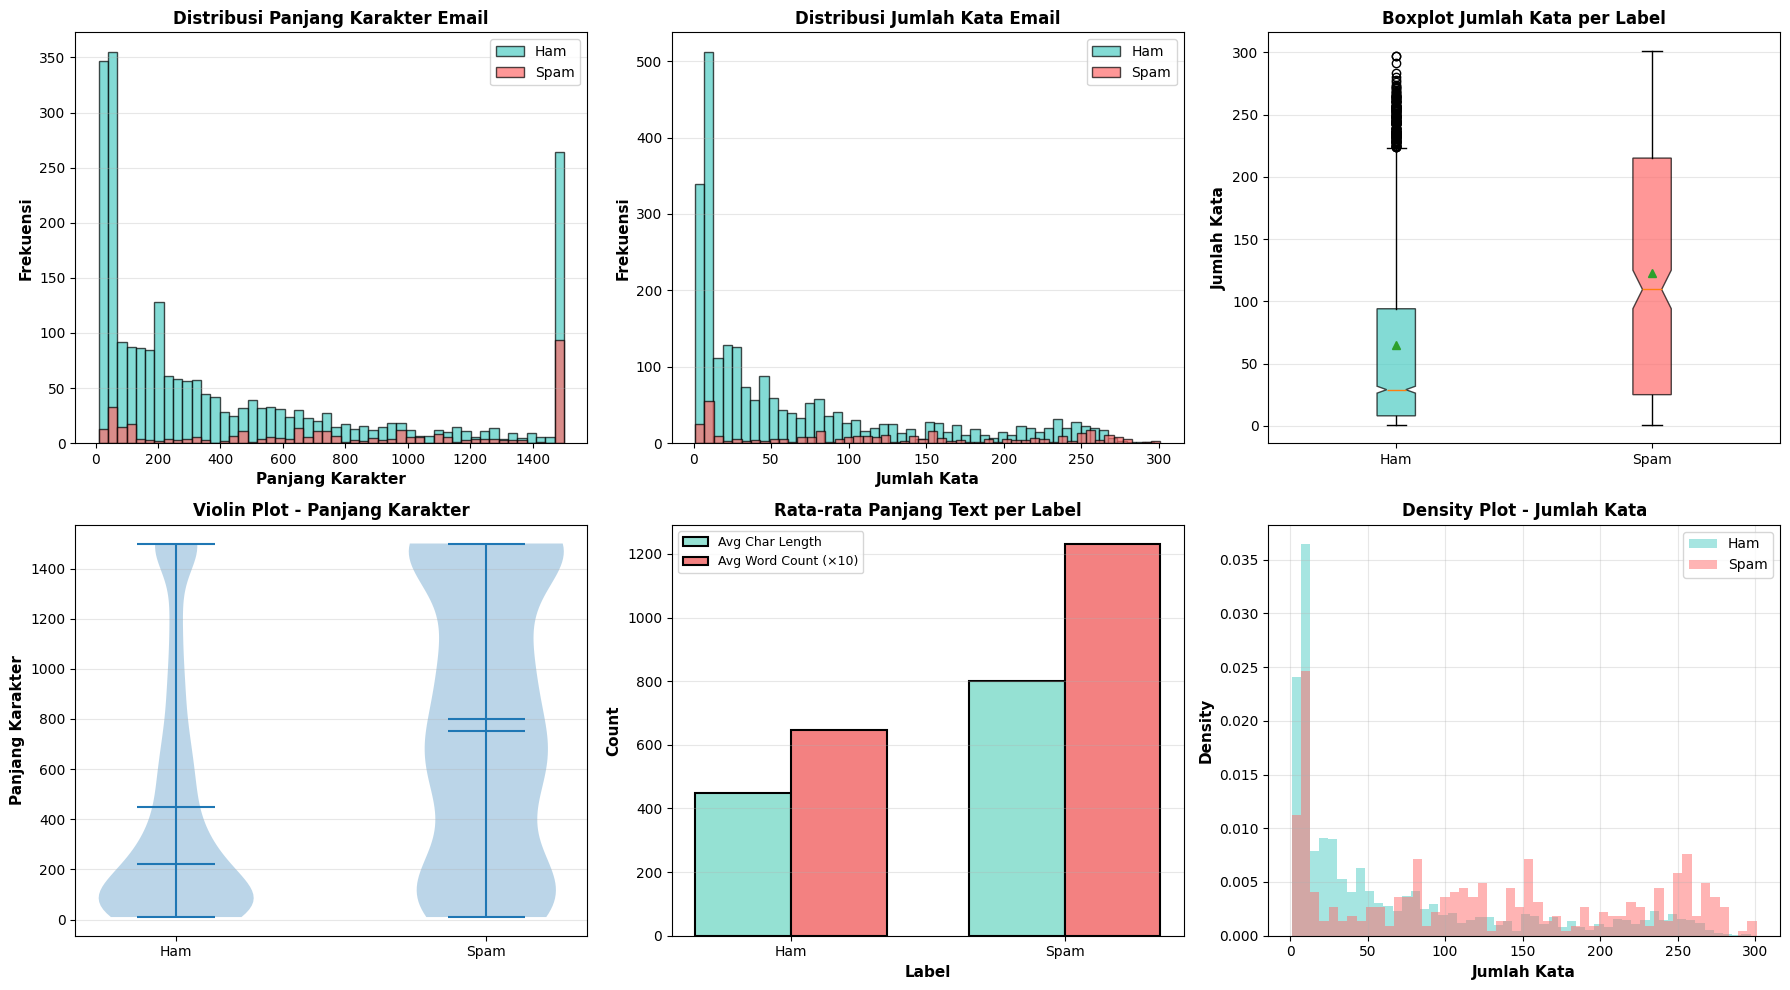

In [10]:
print("\nTEXT LENGTH ANALYSIS:")
df_csv['text_length'] = df_csv['body'].apply(lambda x: len(str(x)))
df_csv['word_count'] = df_csv['body'].apply(lambda x: len(str(x).split()))
df_csv['char_count'] = df_csv['body'].apply(lambda x: len(str(x)))

# Statistik per label
stats_by_label = df_csv.groupby('label')[['text_length', 'word_count']].describe()
print(stats_by_label)

# Visualisasi Text Length
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogram - Text Length
axes[0, 0].hist(
    df_csv[df_csv['label']==0]['text_length'],
    bins=50,
    alpha=0.7,
    label='Ham',
    color='#4ECDC4',
    edgecolor='black'
)
axes[0, 0].hist(
    df_csv[df_csv['label']==1]['text_length'],
    bins=50,
    alpha=0.7,
    label='Spam',
    color='#FF6B6B',
    edgecolor='black'
)
axes[0, 0].set_xlabel('Panjang Karakter', fontsize=11, weight='bold')
axes[0, 0].set_ylabel('Frekuensi', fontsize=11, weight='bold')
axes[0, 0].set_title('Distribusi Panjang Karakter Email', fontsize=12, weight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Histogram - Word Count
axes[0, 1].hist(
    df_csv[df_csv['label']==0]['word_count'],
    bins=50,
    alpha=0.7,
    label='Ham',
    color='#4ECDC4',
    edgecolor='black'
)
axes[0, 1].hist(
    df_csv[df_csv['label']==1]['word_count'],
    bins=50,
    alpha=0.7,
    label='Spam',
    color='#FF6B6B',
    edgecolor='black'
)
axes[0, 1].set_xlabel('Jumlah Kata', fontsize=11, weight='bold')
axes[0, 1].set_ylabel('Frekuensi', fontsize=11, weight='bold')
axes[0, 1].set_title('Distribusi Jumlah Kata Email', fontsize=12, weight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)

# Boxplot - Word Count
bp1 = axes[0, 2].boxplot(
    [df_csv[df_csv['label']==0]['word_count'],
     df_csv[df_csv['label']==1]['word_count']],
    labels=['Ham', 'Spam'],
    patch_artist=True,
    notch=True,
    showmeans=True
)
for patch, color in zip(bp1['boxes'], ['#4ECDC4', '#FF6B6B']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 2].set_ylabel('Jumlah Kata', fontsize=11, weight='bold')
axes[0, 2].set_title('Boxplot Jumlah Kata per Label', fontsize=12, weight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# Violin Plot - Text Length
parts = axes[1, 0].violinplot(
    [df_csv[df_csv['label']==0]['text_length'],
     df_csv[df_csv['label']==1]['text_length']],
    positions=[0, 1],
    showmeans=True,
    showmedians=True
)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Ham', 'Spam'])
axes[1, 0].set_ylabel('Panjang Karakter', fontsize=11, weight='bold')
axes[1, 0].set_title('Violin Plot - Panjang Karakter', fontsize=12, weight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Average comparison
avg_data = df_csv.groupby('label')[['text_length', 'word_count']].mean()
x = np.arange(2)
width = 0.35
bars1 = axes[1, 1].bar(
    x - width/2,
    avg_data['text_length'],
    width,
    label='Avg Char Length',
    color='#95E1D3',
    edgecolor='black',
    linewidth=1.5
)
bars2 = axes[1, 1].bar(
    x + width/2,
    avg_data['word_count'] * 10,
    width,
    label='Avg Word Count (×10)',
    color='#F38181',
    edgecolor='black',
    linewidth=1.5
)
axes[1, 1].set_xlabel('Label', fontsize=11, weight='bold')
axes[1, 1].set_ylabel('Count', fontsize=11, weight='bold')
axes[1, 1].set_title('Rata-rata Panjang Text per Label', fontsize=12, weight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['Ham', 'Spam'])
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3)

# Density Plot
axes[1, 2].hist(
    df_csv[df_csv['label']==0]['word_count'],
    bins=50,
    alpha=0.5,
    density=True,
    label='Ham',
    color='#4ECDC4'
)
axes[1, 2].hist(
    df_csv[df_csv['label']==1]['word_count'],
    bins=50,
    alpha=0.5,
    density=True,
    label='Spam',
    color='#FF6B6B'
)
axes[1, 2].set_xlabel('Jumlah Kata', fontsize=11, weight='bold')
axes[1, 2].set_ylabel('Density', fontsize=11, weight='bold')
axes[1, 2].set_title('Density Plot - Jumlah Kata', fontsize=12, weight='bold')
axes[1, 2].legend(fontsize=10)
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


URL Analysis


URL ANALYSIS:
Total emails with URLs: 1428
Emails without URLs: 1319

URL Distribution by Label:
urls      0     1
label            
0      1180  1195
1       139   233


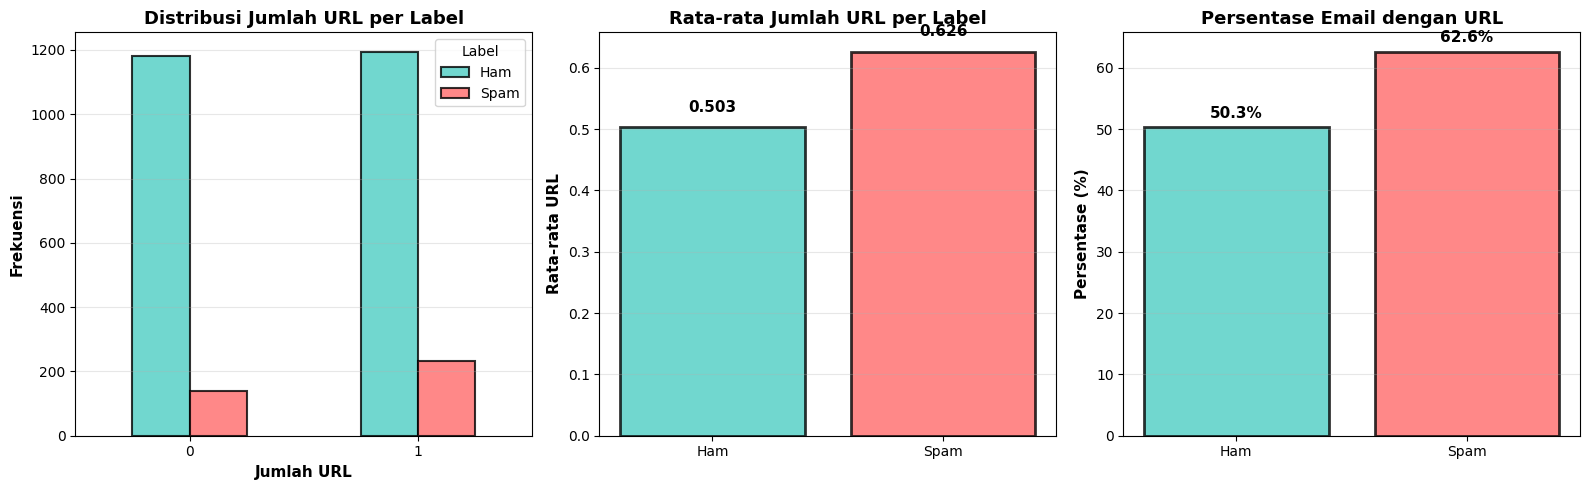

In [11]:
print("\nURL ANALYSIS:")
print(f"Total emails with URLs: {df_csv[df_csv['urls'] > 0].shape[0]}")
print(f"Emails without URLs: {df_csv[df_csv['urls'] == 0].shape[0]}")
print("\nURL Distribution by Label:")
print(df_csv.groupby('label')['urls'].value_counts().unstack(fill_value=0))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# URL Count Distribution
url_dist = df_csv.groupby('label')['urls'].value_counts().unstack(fill_value=0)
url_dist.T.plot(
    kind='bar',
    ax=axes[0],
    color=['#4ECDC4', '#FF6B6B'],
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)
axes[0].set_title('Distribusi Jumlah URL per Label', fontsize=13, weight='bold')
axes[0].set_xlabel('Jumlah URL', fontsize=11, weight='bold')
axes[0].set_ylabel('Frekuensi', fontsize=11, weight='bold')
axes[0].legend(['Ham', 'Spam'], title='Label', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=0)

# Average URLs per Label
avg_urls = df_csv.groupby('label')['urls'].mean()
bars = axes[1].bar(
    ['Ham', 'Spam'],
    avg_urls,
    color=['#4ECDC4', '#FF6B6B'],
    edgecolor='black',
    linewidth=2,
    alpha=0.8
)
axes[1].set_title('Rata-rata Jumlah URL per Label', fontsize=13, weight='bold')
axes[1].set_ylabel('Rata-rata URL', fontsize=11, weight='bold')
axes[1].grid(axis='y', alpha=0.3)
for bar, v in zip(bars, avg_urls):
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        v + 0.02,
        f'{v:.3f}',
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

# Percentage of emails with URLs
url_pct = df_csv.groupby('label')['urls'].apply(lambda x: (x > 0).sum() / len(x) * 100)
bars2 = axes[2].bar(
    ['Ham', 'Spam'],
    url_pct,
    color=['#4ECDC4', '#FF6B6B'],
    edgecolor='black',
    linewidth=2,
    alpha=0.8
)
axes[2].set_title('Persentase Email dengan URL', fontsize=13, weight='bold')
axes[2].set_ylabel('Persentase (%)', fontsize=11, weight='bold')
axes[2].grid(axis='y', alpha=0.3)
for bar, v in zip(bars2, url_pct):
    axes[2].text(
        bar.get_x() + bar.get_width()/2,
        v + 1,
        f'{v:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

plt.tight_layout()
plt.show()



Source Analysis

In [12]:
print("\nSOURCE ANALYSIS:")
print(df_csv['source'].value_counts())




SOURCE ANALYSIS:
source
authentic    2747
Name: count, dtype: int64


Correlation Analysis


CORRELATION ANALYSIS:
                label      urls  text_length  word_count
label        1.000000  0.084368     0.233178    0.246560
urls         0.084368  1.000000     0.454780    0.368775
text_length  0.233178  0.454780     1.000000    0.974738
word_count   0.246560  0.368775     0.974738    1.000000


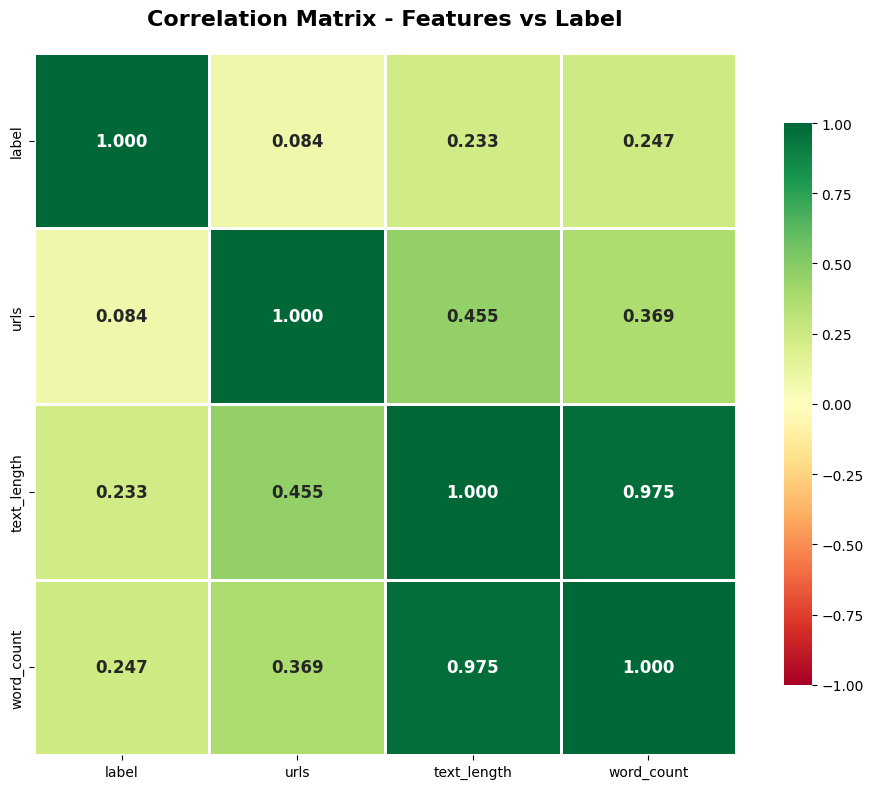

In [13]:
print("\nCORRELATION ANALYSIS:")
corr_features = df_csv[['label', 'urls', 'text_length', 'word_count']].corr()
print(corr_features)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_features,
    annot=True,
    fmt='.3f',
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=2,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
    annot_kws={'size': 12, 'weight': 'bold'}
)
plt.title('Correlation Matrix - Features vs Label', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()



Subject Length Analysis


SUBJECT ANALYSIS:


/tmp/ipython-input-3748338215.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(


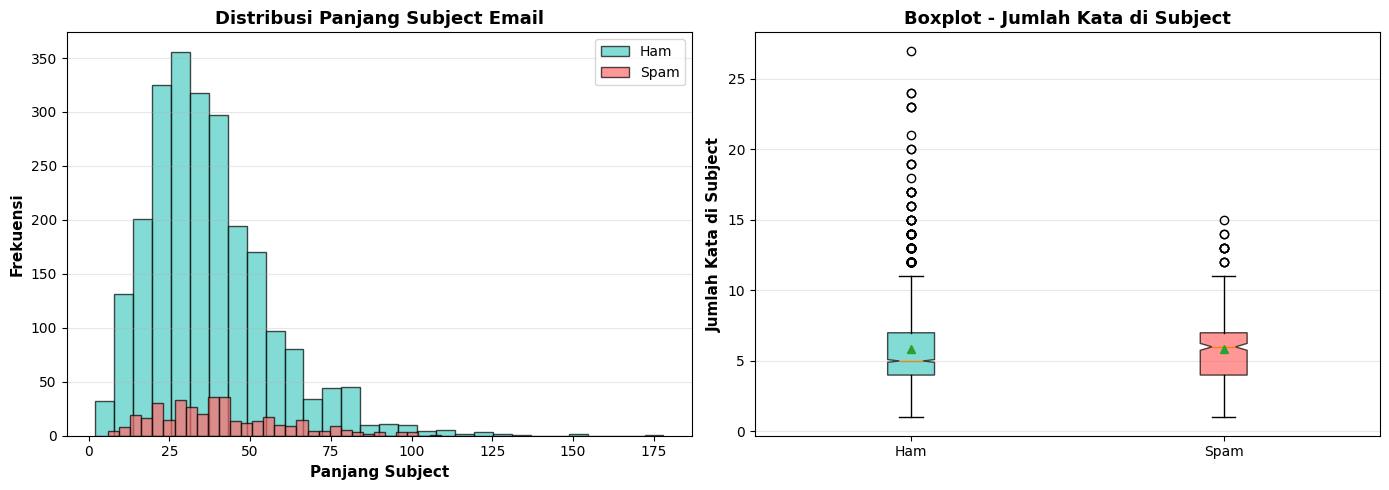

In [14]:
print("\nSUBJECT ANALYSIS:")
df_csv['subject_length'] = df_csv['subject'].apply(lambda x: len(str(x)))
df_csv['subject_word_count'] = df_csv['subject'].apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(
    df_csv[df_csv['label']==0]['subject_length'],
    bins=30,
    alpha=0.7,
    label='Ham',
    color='#4ECDC4',
    edgecolor='black'
)
axes[0].hist(
    df_csv[df_csv['label']==1]['subject_length'],
    bins=30,
    alpha=0.7,
    label='Spam',
    color='#FF6B6B',
    edgecolor='black'
)
axes[0].set_xlabel('Panjang Subject', fontsize=11, weight='bold')
axes[0].set_ylabel('Frekuensi', fontsize=11, weight='bold')
axes[0].set_title('Distribusi Panjang Subject Email', fontsize=13, weight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

bp = axes[1].boxplot(
    [df_csv[df_csv['label']==0]['subject_word_count'],
     df_csv[df_csv['label']==1]['subject_word_count']],
    labels=['Ham', 'Spam'],
    patch_artist=True,
    notch=True,
    showmeans=True
)
for patch, color in zip(bp['boxes'], ['#4ECDC4', '#FF6B6B']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_ylabel('Jumlah Kata di Subject', fontsize=11, weight='bold')
axes[1].set_title('Boxplot - Jumlah Kata di Subject', fontsize=13, weight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

4. Menampilkan jumlah baris dan kolom

In [15]:
df_csv.shape

(2747, 14)

In [16]:
df_csv.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'source', 'file_source', 'text_length', 'word_count', 'char_count',
       'subject_length', 'subject_word_count'],
      dtype='object')

5. Mengecek data duplikat dan menghapus jika ada

In [17]:
df_csv.drop_duplicates(inplace = True)

6. Mengecek kembali bentuk data (jumlah baris dan kolom setelah dihapus duplikat)

In [18]:
df_csv.shape

(2747, 14)

7. Mengecek jumlah nilai kosong di setiap kolom

In [19]:
df_csv.isnull().sum()

,0
sender,0
receiver,81
date,0
subject,0
body,0
label,0
urls,0
source,0
file_source,0
text_length,0


8. Mengecek apakah ada data kosong di kolom ‘body’

In [20]:
print (df_csv['body'].isnull().sum())

0


9. Mengecek tipe data pada kolom ‘body’

In [21]:
print(df_csv['body'].apply(type).value_counts())

body
<class 'str'>    2747
Name: count, dtype: int64


10. Mengganti nilai kosong di kolom ‘body’ dengan string kosong

In [22]:
df_csv['body'] = df_csv['body'].fillna('')

11. Menyimpan teks dan label dari dataset

In [23]:
texts = df_csv['body']
labels = df_csv['label']

12. Mengubah label menjadi bentuk numerik (0 = fake, 1 = real)

In [24]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

13. Menampilkan distribusi label dalam bentuk diagram batang

<Axes: xlabel='label'>

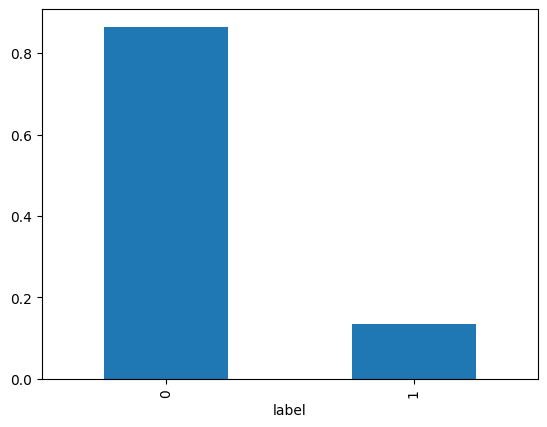

In [25]:
df_csv['label'].value_counts(normalize = True).plot.bar()

14. Membagi dataset menjadi data latih dan data uji (Train/Test)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

15. Melakukan tokenisasi pada data teks

In [27]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)

16. Mengubah teks menjadi urutan angka

In [28]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq =tokenizer.texts_to_sequences(X_test)

17. Melakukan padding agar panjang setiap urutan sama

In [29]:
max_length = 200
X_train_pad = pad_sequences(X_train_seq,padding='post',maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, padding='post',maxlen=max_length)

# RNN

In [30]:
# Membuat model SimpleRNN
model = Sequential()

# Layer Embedding untuk merepresentasikan kata ke dalam bentuk vektor padat
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# Layer RNN sederhana
model.add(SimpleRNN(units=64, activation='tanh'))

# Layer Dropout untuk mengurangi terjadinya overfitting
model.add(Dropout(0.5))

# Layer Dense output (biner)
model.add(Dense(1, activation='sigmoid'))

# Menyusun (compile) model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
history_rnn = model.fit(X_train_pad, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test_pad, y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.8351 - loss: 0.4508 - val_accuracy: 0.8655 - val_loss: 0.3855
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8923 - loss: 0.3645 - val_accuracy: 0.8745 - val_loss: 0.3706
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8975 - loss: 0.3322 - val_accuracy: 0.7727 - val_loss: 0.5093
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.8409 - loss: 0.4041 - val_accuracy: 0.8636 - val_loss: 0.3518
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8999 - loss: 0.3380 - val_accuracy: 0.8655 - val_loss: 0.3732
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9029 - loss: 0.3240 - val_accuracy: 0.8709 - val_loss: 0.3593
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8962 - loss: 0.3225 - val_accuracy: 0.8727 - val_loss: 0.3962
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9029 - loss: 0.3413 - val_accuracy: 0.8745 - val_loss: 

# RNN tanpa Adam learning rate

In [31]:
#Buat model Simple RNN
model = Sequential()
# Layer Embedding untuk representasi kata
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
# Layer RNN sederhana
model.add(SimpleRNN(units=64,activation='tanh'))
# Layer output
model.add(Dense(1,activation='sigmoid'))
# Menyusun model dengan optimizer default
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
# Melatih model
history_rnna = model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7692 - loss: 0.4950 - val_accuracy: 0.8600 - val_loss: 0.3861
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8835 - loss: 0.3592 - val_accuracy: 0.8764 - val_loss: 0.3658
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9015 - loss: 0.3156 - val_accuracy: 0.8418 - val_loss: 0.3927
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9071 - loss: 0.2955 - val_accuracy: 0.8618 - val_loss: 0.3751
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9130 - loss: 0.2813 - val_accuracy: 0.8673 - val_loss: 0.3763
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.8946 - loss: 0.3181 - val_accuracy: 0.8764 - val_loss: 0.3761
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9007 - loss: 0.3167 - val_accuracy: 0.8818 - val_loss: 0.3486
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9170 - loss: 0.2609 - val_accuracy: 0.8655 

# RNN tanpa Dropout

In [32]:
# Membuat model SimpleRNN
model = Sequential()

# Layer Embedding
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# Layer RNN
model.add(SimpleRNN(units=64, activation='tanh'))

# Layer output
model.add(Dense(1, activation='sigmoid'))

# Menyusun model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
history_rnnd = model.fit(X_train_pad, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test_pad, y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7580 - loss: 0.4884 - val_accuracy: 0.8655 - val_loss: 0.3844
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9014 - loss: 0.3368 - val_accuracy: 0.8745 - val_loss: 0.3729
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9105 - loss: 0.2988 - val_accuracy: 0.8582 - val_loss: 0.3887
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9085 - loss: 0.2979 - val_accuracy: 0.8527 - val_loss: 0.3778
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8995 - loss: 0.3142 - val_accuracy: 0.8636 - val_loss: 0.3798
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8987 - loss: 0.3135 - val_accuracy: 0.8655 - val_loss: 0.3792
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.9026 - loss: 0.2962 - val_accuracy: 0.8545 - val_loss: 0.3930
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9096 - loss: 0.2894 - val_accuracy: 0.8509 

# RNN pake dropout yang berbeda
(Sebelumnya 0.5 untuk percobaan diganti jadi 0.4)

In [33]:
# Membuat model LSTM
model = Sequential()
# Layer Embedding
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
# Layer LSTM
model.add(SimpleRNN(units=64,activation='tanh'))
# Layer Dropout untuk mencegah overfitting
model.add(Dropout(0.4))
# Layer output
model.add(Dense(1,activation='sigmoid'))
# Menyusun model
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
# Melatih model
history_rnndd = model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8541 - loss: 0.4372 - val_accuracy: 0.8691 - val_loss: 0.3811
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8835 - loss: 0.3658 - val_accuracy: 0.8745 - val_loss: 0.3765
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.8993 - loss: 0.3234 - val_accuracy: 0.8709 - val_loss: 0.3788
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9087 - loss: 0.3038 - val_accuracy: 0.8655 - val_loss: 0.3739
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9002 - loss: 0.3234 - val_accuracy: 0.8600 - val_loss: 0.3306
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9065 - loss: 0.3162 - val_accuracy: 0.8509 - val_loss: 0.3620
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9171 - loss: 0.2571 - val_accuracy: 0.8655 - val_loss: 0.4722
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8963 - loss: 0.3654 - val_accuracy: 0.8691 -

# LSTM model

In [34]:
#Buat model Simple RNN
model = Sequential()
#Embedding Layer to represent words as dense vectors
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
#LSTM Layer
model.add(LSTM(units=100))
#Dropout Layer untuk menghindari overfitting
model.add(Dropout(0.5))
#Dense Layer for output
model.add(Dense(1,activation='sigmoid'))
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])
#Training the model
history_lstm = model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 389ms/step - accuracy: 0.7835 - loss: 0.4900 - val_accuracy: 0.8600 - val_loss: 0.3882
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 387ms/step - accuracy: 0.8644 - loss: 0.3849 - val_accuracy: 0.8800 - val_loss: 0.3743
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 377ms/step - accuracy: 0.8975 - loss: 0.3466 - val_accuracy: 0.8782 - val_loss: 0.3625
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 398ms/step - accuracy: 0.9052 - loss: 0.3243 - val_accuracy: 0.8782 - val_loss: 0.3709
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 375ms/step - accuracy: 0.9030 - loss: 0.3437 - val_accuracy: 0.8873 - val_loss: 0.3510
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - accuracy: 0.9125 - loss: 0.3042 - val_accuracy: 0.9036 - val_loss: 0.3186
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - accuracy: 0.9262 - loss: 0.2643 - val_accuracy: 0.8873 - val_loss: 0.3230
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.9325 - loss: 0.2290 - val_accu

# BLSTM

In [35]:
model =Sequential()
model.add(Embedding(input_dim=10000,output_dim=50,input_length=150))
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# Melatih model
history_bilstm = model.fit(X_train_pad, y_train,epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 550ms/step - accuracy: 0.7836 - loss: 0.5124 - val_accuracy: 0.8600 - val_loss: 0.3461
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 507ms/step - accuracy: 0.8789 - loss: 0.2757 - val_accuracy: 0.9200 - val_loss: 0.1945
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 513ms/step - accuracy: 0.9741 - loss: 0.0996 - val_accuracy: 0.9582 - val_loss: 0.1134
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step - accuracy: 0.9842 - loss: 0.0565 - val_accuracy: 0.9564 - val_loss: 0.1275
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 504ms/step - accuracy: 0.9922 - loss: 0.0269 - val_accuracy: 0.9545 - val_loss: 0.1458
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 525ms/step - accuracy: 0.9945 - loss: 0.0210 - val_accuracy: 0.9564 - val_loss: 0.1231
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 500ms/step - accuracy: 0.9984 - loss: 0.0114 - val_accuracy: 0.9673 - val_loss: 0.1057
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 503ms/step - accuracy: 0.9955 - loss: 0.0158 - val_accu

# GRU

In [36]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=50, input_length=150))
model.add(GRU(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 356ms/step - accuracy: 0.8039 - loss: 0.5277 - val_accuracy: 0.8600 - val_loss: 0.3918
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - accuracy: 0.8639 - loss: 0.3887 - val_accuracy: 0.8600 - val_loss: 0.3872
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 346ms/step - accuracy: 0.8579 - loss: 0.4029 - val_accuracy: 0.8600 - val_loss: 0.3846
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 348ms/step - accuracy: 0.8601 - loss: 0.3909 - val_accuracy: 0.8600 - val_loss: 0.3814
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.8685 - loss: 0.3624 - val_accuracy: 0.8745 - val_loss: 0.3683
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 364ms/step - accuracy: 0.9017 - loss: 0.3633 - val_accuracy: 0.8691 - val_loss: 1.0135
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.8679 - loss: 0.7786 - val_accuracy: 0.8709 - val_loss: 0.3910
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.8507 - loss: 0.4194 - val_accu

# CNN

In [37]:
model= Sequential()
#Embedding Layer
model.add(Embedding(input_dim=10000,output_dim=50,input_length=150))
#Convulation Layer
model.add(Conv1D(filters=128,kernel_size=5,activation='relu'))
#Dropout Layer mengurangi Overfit
model.add(Dropout(0.5))
#flatten layer untuk convert 2D tensor ke 1D tensor
model.add(Flatten())
#Dense Layer with a single output neuron for (binary classification)
model.add(Dense(1,activation='sigmoid'))
#Compile model
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
#Train model
history_cnn= model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8382 - loss: 0.4543 - val_accuracy: 0.8600 - val_loss: 0.3415
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8705 - loss: 0.2865 - val_accuracy: 0.8982 - val_loss: 0.2027
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9514 - loss: 0.1221 - val_accuracy: 0.9618 - val_loss: 0.0960
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9901 - loss: 0.0298 - val_accuracy: 0.9636 - val_loss: 0.0878
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9909 - loss: 0.0258 - val_accuracy: 0.9655 - val_loss: 0.0922
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9959 - loss: 0.0110 - val_accuracy: 0.9655 - val_loss: 0.1008
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9962 - loss: 0.0145 - val_accuracy: 0.9655 - val_loss: 0.0953
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9961 - loss: 0.0144 - val_accuracy: 0.9636 - 

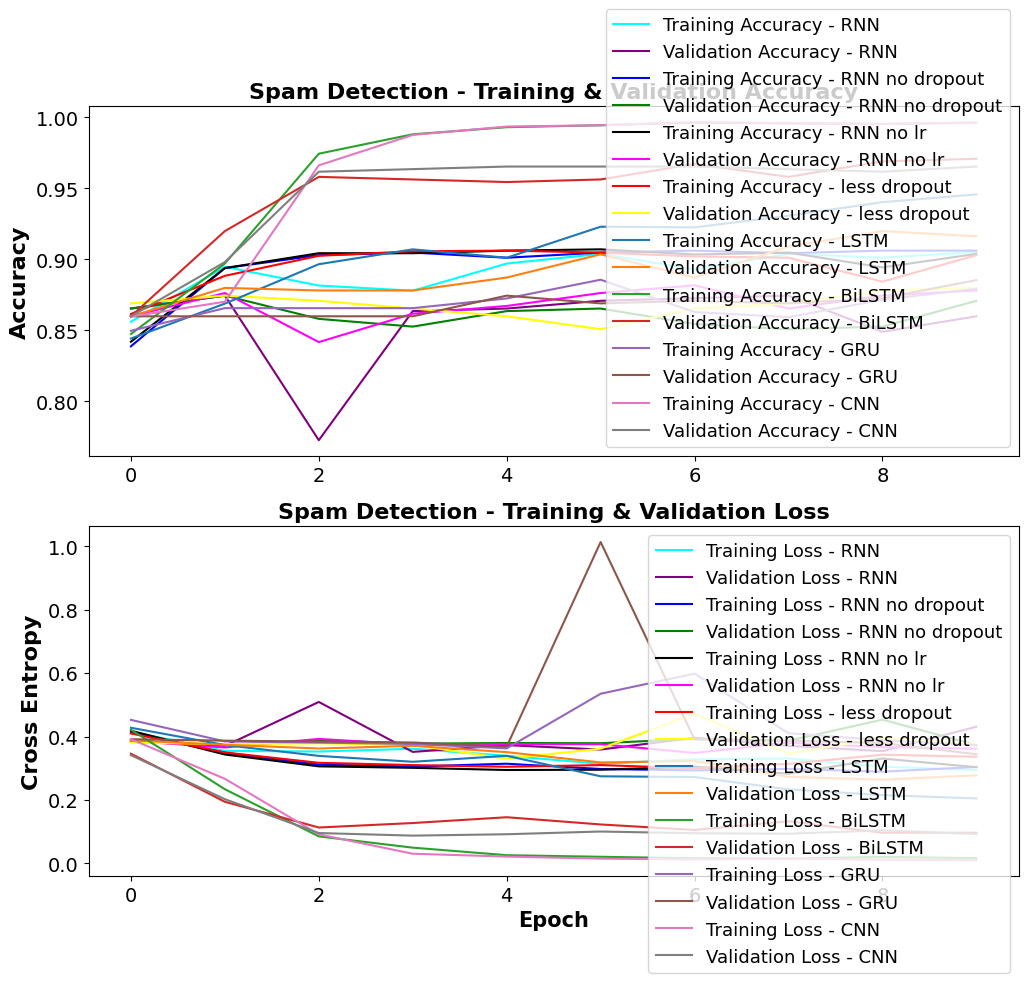

In [38]:
# Akurasi dari berbagai model
acc1 = history_rnn.history['accuracy']
val_acc1 = history_rnn.history['val_accuracy']

acc2 = history_rnnd.history['accuracy']
val_acc2 = history_rnnd.history['val_accuracy']

acc3 = history_rnna.history['accuracy']
val_acc3 = history_rnna.history['val_accuracy']

acc4 = history_rnndd.history['accuracy']
val_acc4 = history_rnndd.history['val_accuracy']

acc5 = history_lstm.history['accuracy']
val_acc5 = history_lstm.history['val_accuracy']

acc6 = history_bilstm.history['accuracy']
val_acc6 = history_bilstm.history['val_accuracy']

acc7 = history_gru.history['accuracy']
val_acc7 = history_gru.history['val_accuracy']

acc8 = history_cnn.history['accuracy']
val_acc8 = history_cnn.history['val_accuracy']

# Loss dari berbagai model
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

loss1 = history_rnnd.history['loss']
val_loss1 = history_rnnd.history['val_loss']

loss2 = history_rnna.history['loss']
val_loss2 = history_rnna.history['val_loss']

loss3 = history_rnndd.history['loss']
val_loss3 = history_rnndd.history['val_loss']

loss4 = history_lstm.history['loss']
val_loss4 = history_lstm.history['val_loss']

loss5 = history_bilstm.history['loss']
val_loss5 = history_bilstm.history['val_loss']

loss6 = history_gru.history['loss']
val_loss6 = history_gru.history['val_loss']

loss7 = history_cnn.history['loss']
val_loss7 = history_cnn.history['val_loss']


plt.figure(figsize=(12, 10))

# Plot akurasi tiap model
plt.subplot(2, 1, 1)

plt.plot(acc1, label='Training Accuracy - RNN', color='cyan')
plt.plot(val_acc1, label='Validation Accuracy - RNN', color='purple')

plt.plot(acc2, label='Training Accuracy - RNN no dropout', color='blue')
plt.plot(val_acc2, label='Validation Accuracy - RNN no dropout', color='green')

plt.plot(acc3, label='Training Accuracy - RNN no lr', color='black')
plt.plot(val_acc3, label='Validation Accuracy - RNN no lr', color='magenta')

plt.plot(acc4, label='Training Accuracy - less dropout', color='red')
plt.plot(val_acc4, label='Validation Accuracy - less dropout', color='yellow')

plt.plot(acc5, label='Training Accuracy - LSTM', color='C0')
plt.plot(val_acc5, label='Validation Accuracy - LSTM', color='C1')

plt.plot(acc6, label='Training Accuracy - BiLSTM', color='C2')
plt.plot(val_acc6, label='Validation Accuracy - BiLSTM', color='C3')

plt.plot(acc7, label='Training Accuracy - GRU', color='C4')
plt.plot(val_acc7, label='Validation Accuracy - GRU', color='C5')

plt.plot(acc8, label='Training Accuracy - CNN', color='C6')
plt.plot(val_acc8, label='Validation Accuracy - CNN', color='C7')



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Spam Detection - Training & Validation Accuracy', fontsize=16, weight='bold')

# Plot loss tiap model
plt.subplot(2, 1, 2)

plt.plot(loss, label='Training Loss - RNN', color='cyan')
plt.plot(val_loss, label='Validation Loss - RNN', color='purple')

plt.plot(loss1, label='Training Loss - RNN no dropout', color='blue')
plt.plot(val_loss1, label='Validation Loss - RNN no dropout', color='green')

plt.plot(loss2, label='Training Loss - RNN no lr', color='black')
plt.plot(val_loss2, label='Validation Loss - RNN no lr', color='magenta')

plt.plot(loss3, label='Training Loss - less dropout', color='red')
plt.plot(val_loss3, label='Validation Loss - less dropout', color='yellow')

plt.plot(loss4, label='Training Loss - LSTM', color='C0')
plt.plot(val_loss4, label='Validation Loss - LSTM', color='C1')

plt.plot(loss5, label='Training Loss - BiLSTM', color='C2')
plt.plot(val_loss5, label='Validation Loss - BiLSTM', color='C3')

plt.plot(loss6, label='Training Loss - GRU', color='C4')
plt.plot(val_loss6, label='Validation Loss - GRU', color='C5')

plt.plot(loss7, label='Training Loss - CNN', color='C6')
plt.plot(val_loss7, label='Validation Loss - CNN', color='C7')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Spam Detection - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

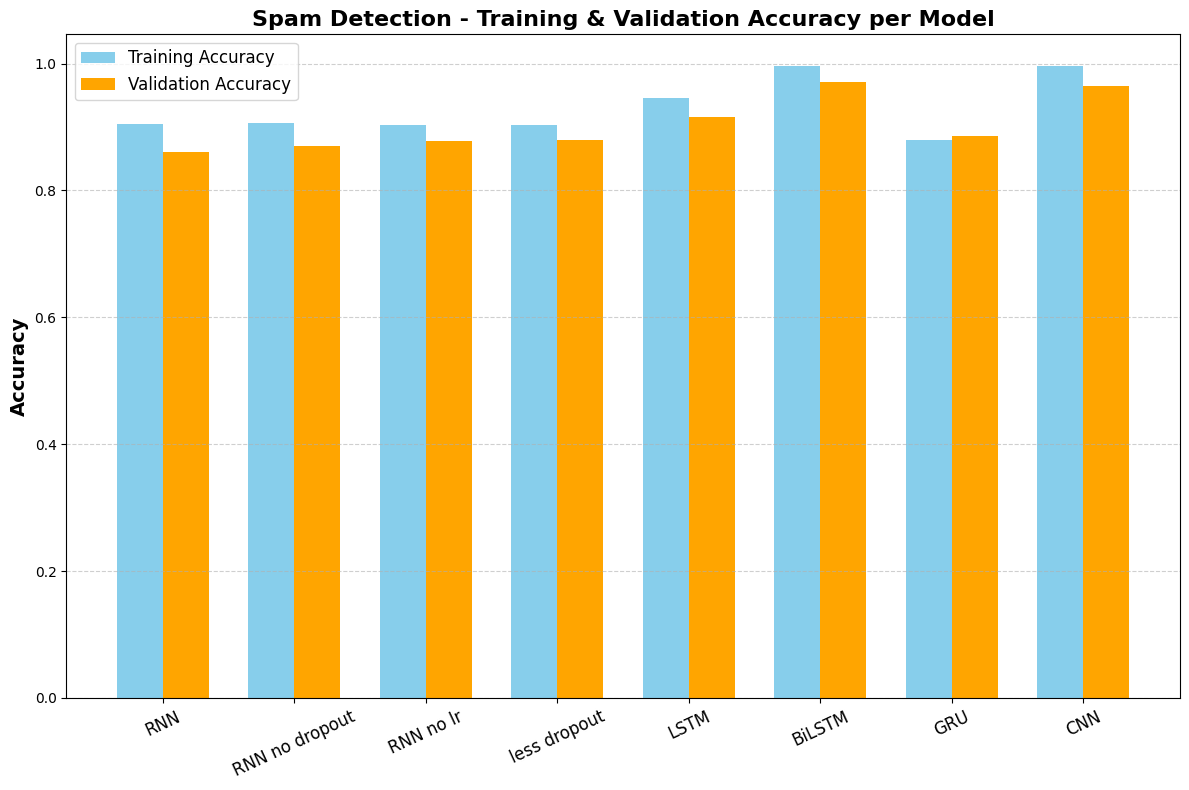

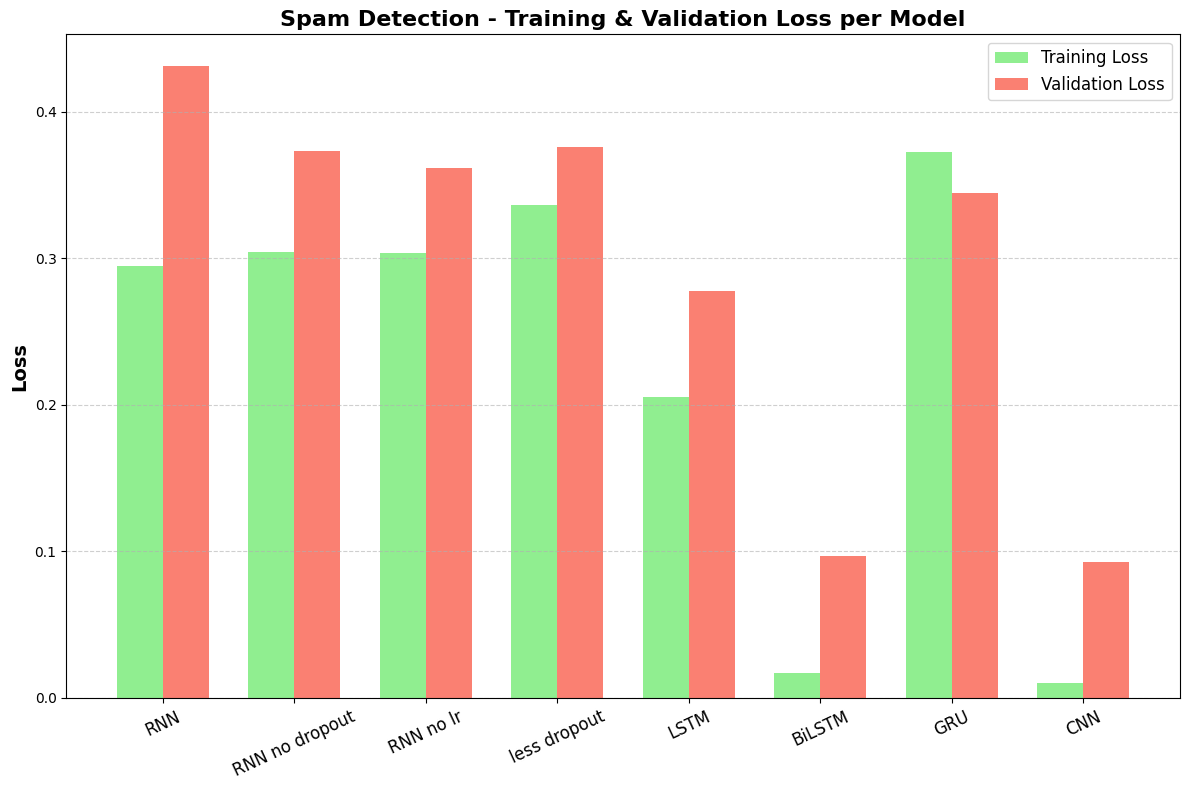

In [39]:
# Ambil nilai terakhir (epoch terakhir) dari setiap model
models = [
    'RNN', 'RNN no dropout', 'RNN no lr', 'less dropout',
    'LSTM', 'BiLSTM', 'GRU', 'CNN'
]

train_acc = [
    history_rnn.history['accuracy'][-1],
    history_rnnd.history['accuracy'][-1],
    history_rnna.history['accuracy'][-1],
    history_rnndd.history['accuracy'][-1],
    history_lstm.history['accuracy'][-1],
    history_bilstm.history['accuracy'][-1],
    history_gru.history['accuracy'][-1],
    history_cnn.history['accuracy'][-1]
]

val_acc = [
    history_rnn.history['val_accuracy'][-1],
    history_rnnd.history['val_accuracy'][-1],
    history_rnna.history['val_accuracy'][-1],
    history_rnndd.history['val_accuracy'][-1],
    history_lstm.history['val_accuracy'][-1],
    history_bilstm.history['val_accuracy'][-1],
    history_gru.history['val_accuracy'][-1],
    history_cnn.history['val_accuracy'][-1]
]

train_loss = [
    history_rnn.history['loss'][-1],
    history_rnnd.history['loss'][-1],
    history_rnna.history['loss'][-1],
    history_rnndd.history['loss'][-1],
    history_lstm.history['loss'][-1],
    history_bilstm.history['loss'][-1],
    history_gru.history['loss'][-1],
    history_cnn.history['loss'][-1]
]

val_loss = [
    history_rnn.history['val_loss'][-1],
    history_rnnd.history['val_loss'][-1],
    history_rnna.history['val_loss'][-1],
    history_rnndd.history['val_loss'][-1],
    history_lstm.history['val_loss'][-1],
    history_bilstm.history['val_loss'][-1],
    history_gru.history['val_loss'][-1],
    history_cnn.history['val_loss'][-1]
]


x = np.arange(len(models))
width = 0.35  # lebar batang


plt.figure(figsize=(12, 8))
plt.bar(x - width/2, train_acc, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy', color='orange')

plt.xticks(x, models, rotation=25, fontsize=12)
plt.ylabel('Accuracy', fontsize=14, weight='bold')
plt.title('Spam Detection - Training & Validation Accuracy per Model', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
plt.bar(x - width/2, train_loss, width, label='Training Loss', color='lightgreen')
plt.bar(x + width/2, val_loss, width, label='Validation Loss', color='salmon')

plt.xticks(x, models, rotation=25, fontsize=12)
plt.ylabel('Loss', fontsize=14, weight='bold')
plt.title('Spam Detection - Training & Validation Loss per Model', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [40]:
final_results = {
    "Model": [
        "RNN (Adam, Dropout=0.5)",
        "RNN tanpa Dropout",
        "RNN tanpa Adam LR",
        "RNN Dropout=0.4",
        "LSTM",
        "BiLSTM",
        "GRU",
        "CNN"
    ],
    "Train Accuracy": [
        acc1[-1], acc2[-1], acc3[-1], acc4[-1],
        acc5[-1], acc6[-1], acc7[-1], acc8[-1]
    ],
    "Validation Accuracy": [
        val_acc1[-1], val_acc2[-1], val_acc3[-1], val_acc4[-1],
        val_acc5[-1], val_acc6[-1], val_acc7[-1], val_acc8[-1]
    ]
}

df_results = pd.DataFrame(final_results)

# Styling tabel biar bergaris dan rapi
styled_df = (
    df_results.style
    .set_table_styles(
        [
            {"selector": "th, td", "props": [("border", "1px solid black"), ("padding", "6px")]},
            {"selector": "th", "props": [("background-color", "#323232"), ("font-weight", "bold")]}
        ]
    )
    .format(
        {"Train Accuracy": "{:.4f}", "Validation Accuracy": "{:.4f}"},
        na_rep="-"
    )
    .hide(axis="index")
)

styled_df

Model,Train Accuracy,Validation Accuracy
"RNN (Adam, Dropout=0.5)",0.9053,0.8600
RNN tanpa Dropout,0.9062,0.8709
RNN tanpa Adam LR,0.9040,0.8782
RNN Dropout=0.4,0.9030,0.8800
LSTM,0.9458,0.9164
BiLSTM,0.9964,0.9709
GRU,0.8794,0.8855
CNN,0.9964,0.9655


TOP 2 MODELS (ini masih Bilstm sama CNN)

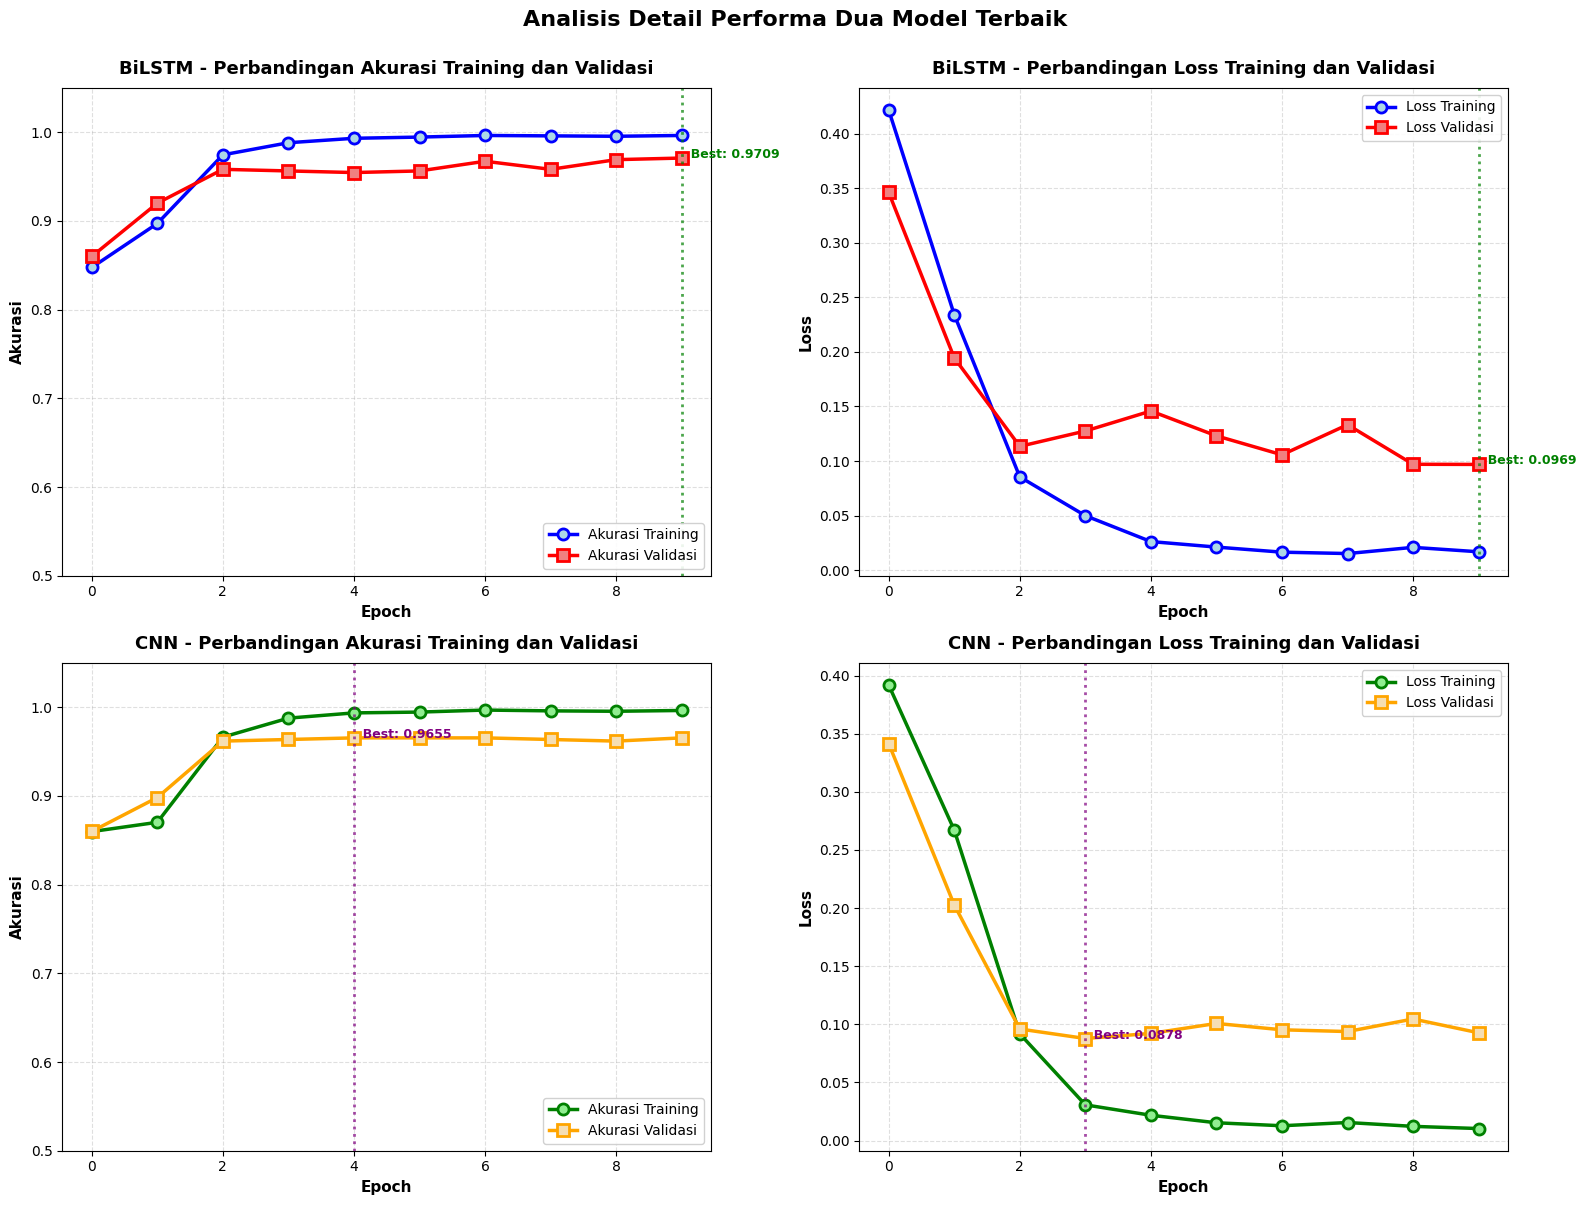


ANALISIS OVERFITTING DAN UNDERFITTING

Model: BiLSTM
──────────────────────────────────────────────────────────────────────
Training Accuracy   : 0.9964 (99.64%)
Validation Accuracy : 0.9709 (97.09%)
Selisih Akurasi     : 0.0254 (2.54%)
Training Loss       : 0.0168
Validation Loss     : 0.0969
Selisih Loss        : 0.0801
Std Akurasi Val (5 epoch terakhir): 0.0059

Kesimpulan:
Model sudah cukup seimbang antara training dan validasi.

Model: CNN
──────────────────────────────────────────────────────────────────────
Training Accuracy   : 0.9964 (99.64%)
Validation Accuracy : 0.9655 (96.55%)
Selisih Akurasi     : 0.0309 (3.09%)
Training Loss       : 0.0103
Validation Loss     : 0.0927
Selisih Loss        : 0.0824
Std Akurasi Val (5 epoch terakhir): 0.0015

Kesimpulan:
Model sudah cukup seimbang antara training dan validasi.



In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisis Detail Performa Dua Model Terbaik',
             fontsize=16, weight='bold', y=1.00)

# akurasi BiLSTM
axes[0, 0].plot(history_bilstm.history['accuracy'], 'b-', linewidth=2.5,
                marker='o', markersize=8, label='Akurasi Training',
                markerfacecolor='lightblue', markeredgecolor='blue', markeredgewidth=2)
axes[0, 0].plot(history_bilstm.history['val_accuracy'], 'r-', linewidth=2.5,
                marker='s', markersize=8, label='Akurasi Validasi',
                markerfacecolor='lightcoral', markeredgecolor='red', markeredgewidth=2)
axes[0, 0].set_title('BiLSTM - Perbandingan Akurasi Training dan Validasi',
                     fontsize=13, weight='bold', pad=10)
axes[0, 0].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[0, 0].set_ylabel('Akurasi', fontsize=11, weight='bold')
axes[0, 0].legend(loc='lower right', fontsize=10, framealpha=0.9)
axes[0, 0].grid(True, alpha=0.4, linestyle='--')
axes[0, 0].set_ylim([0.5, 1.05])

# nyari epoch dengan akurasi validasi paling tinggi
best_epoch_acc = np.argmax(history_bilstm.history['val_accuracy'])
best_val_acc = history_bilstm.history['val_accuracy'][best_epoch_acc]
axes[0, 0].axvline(x=best_epoch_acc, color='green', linestyle=':', linewidth=2, alpha=0.7)
axes[0, 0].text(best_epoch_acc, best_val_acc, f'  Best: {best_val_acc:.4f}',
               fontsize=9, weight='bold', color='green')

# loss BiLSTM
axes[0, 1].plot(history_bilstm.history['loss'], 'b-', linewidth=2.5,
                marker='o', markersize=8, label='Loss Training',
                markerfacecolor='lightblue', markeredgecolor='blue', markeredgewidth=2)
axes[0, 1].plot(history_bilstm.history['val_loss'], 'r-', linewidth=2.5,
                marker='s', markersize=8, label='Loss Validasi',
                markerfacecolor='lightcoral', markeredgecolor='red', markeredgewidth=2)
axes[0, 1].set_title('BiLSTM - Perbandingan Loss Training dan Validasi',
                     fontsize=13, weight='bold', pad=10)
axes[0, 1].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[0, 1].set_ylabel('Loss', fontsize=11, weight='bold')
axes[0, 1].legend(loc='upper right', fontsize=10, framealpha=0.9)
axes[0, 1].grid(True, alpha=0.4, linestyle='--')

# nyari epoch dengan loss validasi paling rendah
best_epoch_loss = np.argmin(history_bilstm.history['val_loss'])
best_val_loss = history_bilstm.history['val_loss'][best_epoch_loss]
axes[0, 1].axvline(x=best_epoch_loss, color='green', linestyle=':', linewidth=2, alpha=0.7)
axes[0, 1].text(best_epoch_loss, best_val_loss, f'  Best: {best_val_loss:.4f}',
               fontsize=9, weight='bold', color='green')

# akurasi CNN
axes[1, 0].plot(history_cnn.history['accuracy'], 'g-', linewidth=2.5,
                marker='o', markersize=8, label='Akurasi Training',
                markerfacecolor='lightgreen', markeredgecolor='green', markeredgewidth=2)
axes[1, 0].plot(history_cnn.history['val_accuracy'], 'orange', linewidth=2.5,
                marker='s', markersize=8, label='Akurasi Validasi',
                markerfacecolor='wheat', markeredgecolor='orange', markeredgewidth=2)
axes[1, 0].set_title('CNN - Perbandingan Akurasi Training dan Validasi',
                     fontsize=13, weight='bold', pad=10)
axes[1, 0].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[1, 0].set_ylabel('Akurasi', fontsize=11, weight='bold')
axes[1, 0].legend(loc='lower right', fontsize=10, framealpha=0.9)
axes[1, 0].grid(True, alpha=0.4, linestyle='--')
axes[1, 0].set_ylim([0.5, 1.05])

# nyari epoch terbaik CNN berdasarkan akurasi validasi
best_epoch_acc_cnn = np.argmax(history_cnn.history['val_accuracy'])
best_val_acc_cnn = history_cnn.history['val_accuracy'][best_epoch_acc_cnn]
axes[1, 0].axvline(x=best_epoch_acc_cnn, color='purple', linestyle=':', linewidth=2, alpha=0.7)
axes[1, 0].text(best_epoch_acc_cnn, best_val_acc_cnn, f'  Best: {best_val_acc_cnn:.4f}',
               fontsize=9, weight='bold', color='purple')

# loss CNN
axes[1, 1].plot(history_cnn.history['loss'], 'g-', linewidth=2.5,
                marker='o', markersize=8, label='Loss Training',
                markerfacecolor='lightgreen', markeredgecolor='green', markeredgewidth=2)
axes[1, 1].plot(history_cnn.history['val_loss'], 'orange', linewidth=2.5,
                marker='s', markersize=8, label='Loss Validasi',
                markerfacecolor='wheat', markeredgecolor='orange', markeredgewidth=2)
axes[1, 1].set_title('CNN - Perbandingan Loss Training dan Validasi',
                     fontsize=13, weight='bold', pad=10)
axes[1, 1].set_xlabel('Epoch', fontsize=11, weight='bold')
axes[1, 1].set_ylabel('Loss', fontsize=11, weight='bold')
axes[1, 1].legend(loc='upper right', fontsize=10, framealpha=0.9)
axes[1, 1].grid(True, alpha=0.4, linestyle='--')

# nyari epoch dengan loss validasi paling kecil di CNN
best_epoch_loss_cnn = np.argmin(history_cnn.history['val_loss'])
best_val_loss_cnn = history_cnn.history['val_loss'][best_epoch_loss_cnn]
axes[1, 1].axvline(x=best_epoch_loss_cnn, color='purple', linestyle=':', linewidth=2, alpha=0.7)
axes[1, 1].text(best_epoch_loss_cnn, best_val_loss_cnn, f'  Best: {best_val_loss_cnn:.4f}',
               fontsize=9, weight='bold', color='purple')

plt.tight_layout()
plt.show()

print("\nANALISIS OVERFITTING DAN UNDERFITTING")
print("="*80)

for model_name, history in [('BiLSTM', history_bilstm), ('CNN', history_cnn)]:
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    # selisih performa training dan validasi
    gap_acc = train_acc - val_acc
    gap_loss = val_loss - train_loss

    # ngeliat kestabilan akurasi validasi di beberapa epoch terakhir
    val_acc_std = np.std(history.history['val_accuracy'][-5:])

    print(f"\nModel: {model_name}")
    print(f"{'─'*70}")
    print(f"Training Accuracy   : {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"Validation Accuracy : {val_acc:.4f} ({val_acc*100:.2f}%)")
    print(f"Selisih Akurasi     : {gap_acc:.4f} ({gap_acc*100:.2f}%)")
    print(f"Training Loss       : {train_loss:.4f}")
    print(f"Validation Loss     : {val_loss:.4f}")
    print(f"Selisih Loss        : {gap_loss:.4f}")
    print(f"Std Akurasi Val (5 epoch terakhir): {val_acc_std:.4f}")

    print("\nKesimpulan:")
    if gap_acc > 0.1:
        print("Model mengalami overfitting yang cukup jelas.")
        print("Performa training jauh lebih tinggi dibanding data validasi.")
        print("Perlu penyesuaian seperti regularisasi atau dropout.")
    elif gap_acc > 0.05:
        print("Terdapat indikasi overfitting ringan.")
        print("Masih bisa ditoleransi, tapi sebaiknya dipantau.")
    elif val_acc < 0.7:
        print("Model cenderung underfitting.")
        print("Performa validasi masih rendah dan belum optimal.")
    else:
        print("Model sudah cukup seimbang antara training dan validasi.")

    if val_acc_std > 0.02:
        print("Akurasi validasi terlihat fluktuatif di beberapa epoch terakhir.")
        print("Training kemungkinan belum stabil.")

print("\n" + "="*80)

Perbandingan Seluruh Model

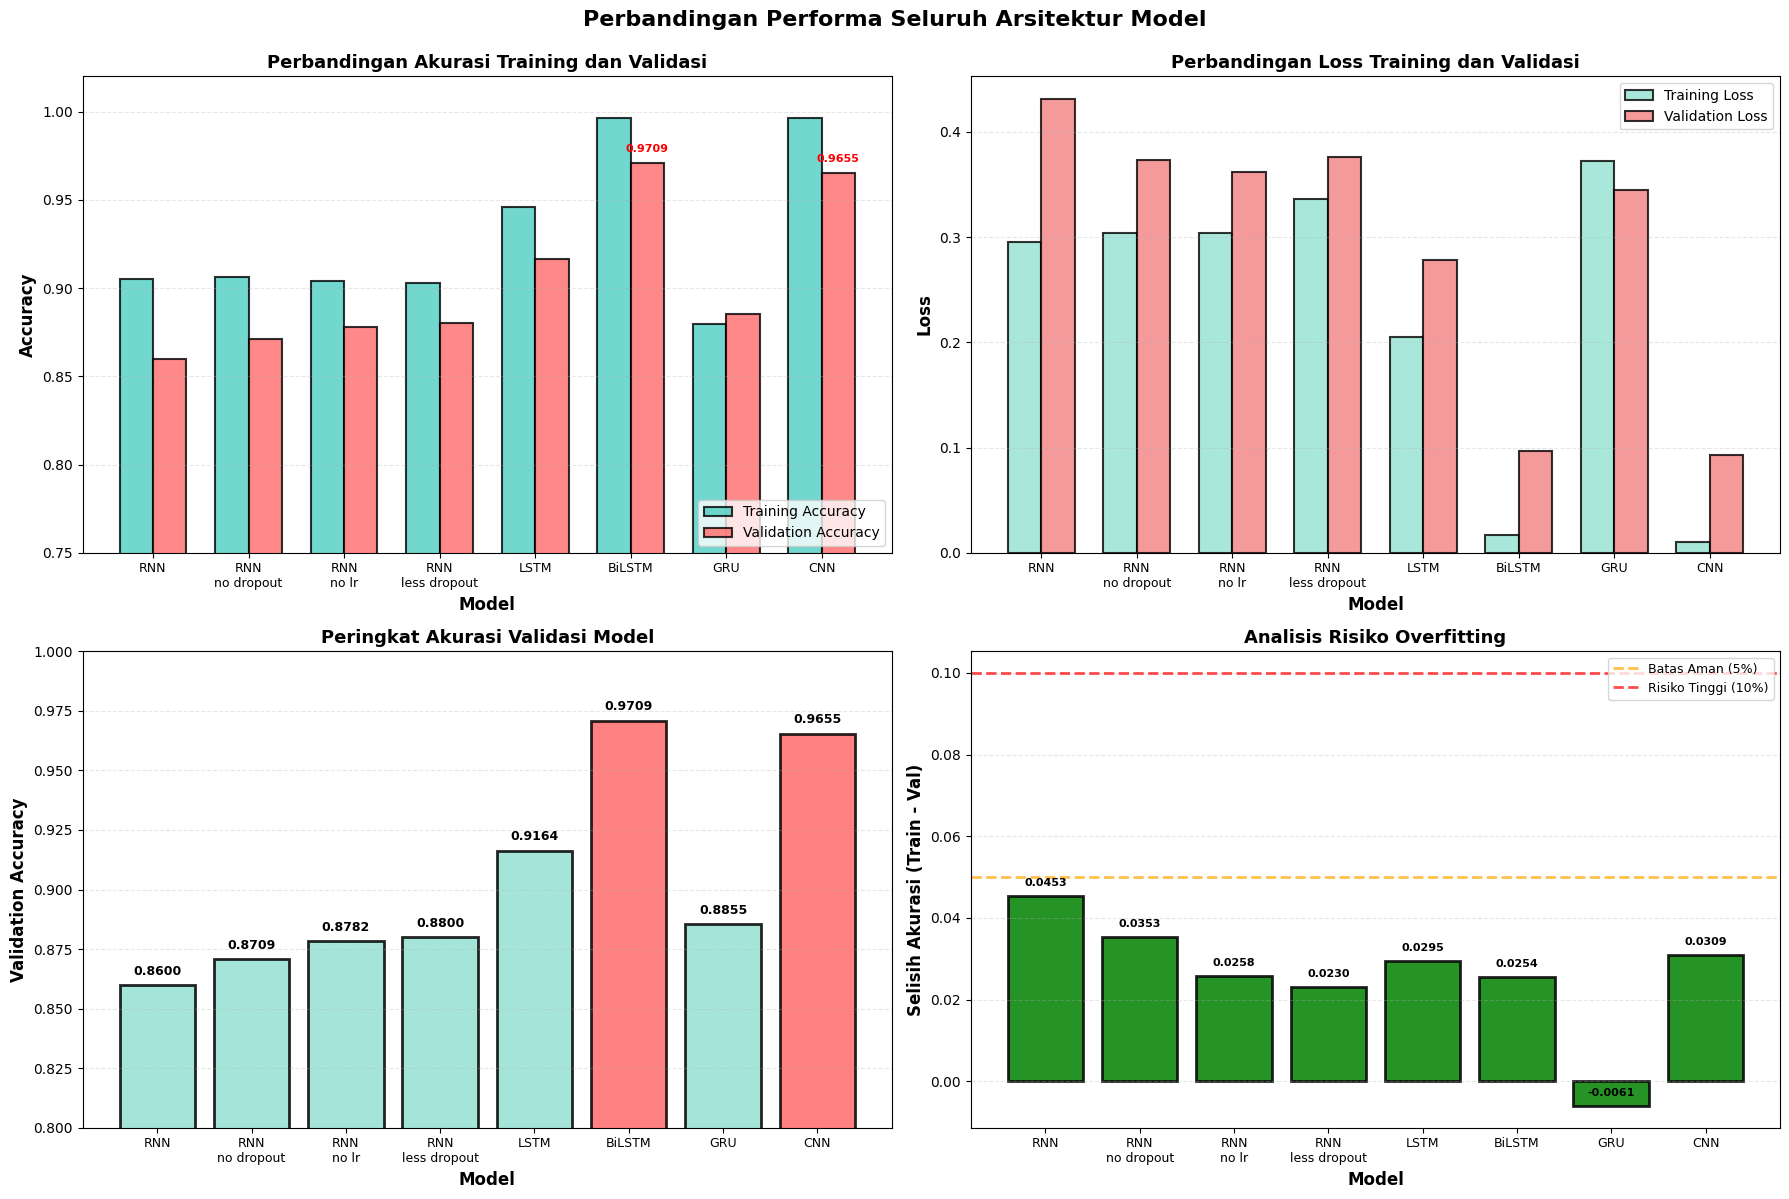

In [42]:
# nyiapin nama model yang mau dibandingin
models = ['RNN', 'RNN\nno dropout', 'RNN\nno lr', 'RNN\nless dropout',
          'LSTM', 'BiLSTM', 'GRU', 'CNN']

# ambil akurasi training terakhir dari tiap model
train_acc = [
    history_rnn.history['accuracy'][-1],
    history_rnnd.history['accuracy'][-1],
    history_rnna.history['accuracy'][-1],
    history_rnndd.history['accuracy'][-1],
    history_lstm.history['accuracy'][-1],
    history_bilstm.history['accuracy'][-1],
    history_gru.history['accuracy'][-1],
    history_cnn.history['accuracy'][-1]
]

# ambil akurasi validasi terakhir dari tiap model
val_acc = [
    history_rnn.history['val_accuracy'][-1],
    history_rnnd.history['val_accuracy'][-1],
    history_rnna.history['val_accuracy'][-1],
    history_rnndd.history['val_accuracy'][-1],
    history_lstm.history['val_accuracy'][-1],
    history_bilstm.history['val_accuracy'][-1],
    history_gru.history['val_accuracy'][-1],
    history_cnn.history['val_accuracy'][-1]
]

# ambil nilai loss training terakhir
train_loss = [
    history_rnn.history['loss'][-1],
    history_rnnd.history['loss'][-1],
    history_rnna.history['loss'][-1],
    history_rnndd.history['loss'][-1],
    history_lstm.history['loss'][-1],
    history_bilstm.history['loss'][-1],
    history_gru.history['loss'][-1],
    history_cnn.history['loss'][-1]
]

# ambil nilai loss validasi terakhir
val_loss = [
    history_rnn.history['val_loss'][-1],
    history_rnnd.history['val_loss'][-1],
    history_rnna.history['val_loss'][-1],
    history_rnndd.history['val_loss'][-1],
    history_lstm.history['val_loss'][-1],
    history_bilstm.history['val_loss'][-1],
    history_gru.history['val_loss'][-1],
    history_cnn.history['val_loss'][-1]
]

# bikin figure buat perbandingan semua model
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Perbandingan Performa Seluruh Arsitektur Model',
             fontsize=16, weight='bold', y=0.995)

x = np.arange(len(models))
width = 0.35

# perbandingan akurasi training dan validasi
bars1 = axes[0, 0].bar(x - width/2, train_acc, width, label='Training Accuracy',
                       color='#4ECDC4', edgecolor='black', linewidth=1.5, alpha=0.8)
bars2 = axes[0, 0].bar(x + width/2, val_acc, width, label='Validation Accuracy',
                       color='#FF6B6B', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0, 0].set_xlabel('Model', fontsize=12, weight='bold')
axes[0, 0].set_ylabel('Accuracy', fontsize=12, weight='bold')
axes[0, 0].set_title('Perbandingan Akurasi Training dan Validasi', fontsize=13, weight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, fontsize=9)
axes[0, 0].legend(fontsize=10, loc='lower right')
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_ylim([0.75, 1.02])

# nandain dua model dengan akurasi validasi tertinggi
top2_idx = np.argsort(val_acc)[-2:]
for idx in top2_idx:
    axes[0, 0].text(idx + width/2, val_acc[idx] + 0.005, f'{val_acc[idx]:.4f}',
                   ha='center', va='bottom', fontsize=8, weight='bold', color='red')

# perbandingan loss training dan validasi
bars3 = axes[0, 1].bar(x - width/2, train_loss, width, label='Training Loss',
                       color='#95E1D3', edgecolor='black', linewidth=1.5, alpha=0.8)
bars4 = axes[0, 1].bar(x + width/2, val_loss, width, label='Validation Loss',
                       color='#F38181', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0, 1].set_xlabel('Model', fontsize=12, weight='bold')
axes[0, 1].set_ylabel('Loss', fontsize=12, weight='bold')
axes[0, 1].set_title('Perbandingan Loss Training dan Validasi', fontsize=13, weight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, fontsize=9)
axes[0, 1].legend(fontsize=10, loc='upper right')
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

# fokus ke akurasi validasi biar lebih kelihatan bedanya
colors_val = ['#95E1D3' if i not in top2_idx else '#FF6B6B' for i in range(len(models))]
bars5 = axes[1, 0].bar(x, val_acc, color=colors_val, edgecolor='black',
                       linewidth=2, alpha=0.85)
axes[1, 0].set_xlabel('Model', fontsize=12, weight='bold')
axes[1, 0].set_ylabel('Validation Accuracy', fontsize=12, weight='bold')
axes[1, 0].set_title('Peringkat Akurasi Validasi Model', fontsize=13, weight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, fontsize=9)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 0].set_ylim([0.8, 1.0])

# nampilin nilai akurasi di atas bar
for bar, v in zip(bars5, val_acc):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, v + 0.003,
                   f'{v:.4f}', ha='center', va='bottom',
                   fontsize=9, weight='bold')

# ngitung selisih akurasi training dan validasi buat cek overfitting
gaps = [t - v for t, v in zip(train_acc, val_acc)]
colors_gap = ['green' if g < 0.05 else 'orange' if g < 0.1 else 'red' for g in gaps]
bars6 = axes[1, 1].bar(x, gaps, color=colors_gap, edgecolor='black',
                       linewidth=2, alpha=0.85)
axes[1, 1].axhline(y=0.05, color='orange', linestyle='--', linewidth=2,
                   label='Batas Aman (5%)', alpha=0.7)
axes[1, 1].axhline(y=0.1, color='red', linestyle='--', linewidth=2,
                   label='Risiko Tinggi (10%)', alpha=0.7)
axes[1, 1].set_xlabel('Model', fontsize=12, weight='bold')
axes[1, 1].set_ylabel('Selisih Akurasi (Train - Val)', fontsize=12, weight='bold')
axes[1, 1].set_title('Analisis Risiko Overfitting', fontsize=13, weight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models, fontsize=9)
axes[1, 1].legend(fontsize=9, loc='upper right')
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

# nampilin nilai gap di atas bar
for bar, g in zip(bars6, gaps):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, g + 0.002,
                   f'{g:.4f}', ha='center', va='bottom',
                   fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

Tabel Perbandingan

In [43]:
print("\n" + "="*80)
print("Tabel Perbandingan Model")
print("="*80)

# nyusun data perbandingan semua model ke dalam DataFrame
comparison_data = {
    'Model': ['RNN', 'RNN no dropout', 'RNN no lr', 'RNN less dropout',
              'LSTM', 'BiLSTM', 'GRU', 'CNN'],
    'Train Acc': train_acc,
    'Val Acc': val_acc,
    'Train Loss': train_loss,
    'Val Loss': val_loss,
    'Acc Gap': [t - v for t, v in zip(train_acc, val_acc)],
    'Loss Gap': [v - t for t, v in zip(train_loss, val_loss)]
}

df_comparison = pd.DataFrame(comparison_data)

# ngelompokkin risiko overfitting berdasarkan selisih akurasi
df_comparison['Overfitting Risk'] = df_comparison['Acc Gap'].apply(
    lambda x: 'High' if x > 0.1 else ('Medium' if x > 0.05 else 'Low')
)

# nentuin peringkat model berdasarkan akurasi validasi
df_comparison['Rank'] = df_comparison['Val Acc'].rank(ascending=False).astype(int)
df_comparison = df_comparison.sort_values('Rank')

print("\nHASIL PERBANDINGAN LENGKAP MODEL:")
print(df_comparison.to_string(index=False))


Tabel Perbandingan Model

HASIL PERBANDINGAN LENGKAP MODEL:
           Model  Train Acc  Val Acc  Train Loss  Val Loss   Acc Gap  Loss Gap Overfitting Risk  Rank
          BiLSTM   0.996359 0.970909    0.016804  0.096870  0.025450  0.080066              Low     1
             CNN   0.996359 0.965455    0.010325  0.092713  0.030904  0.082388              Low     2
            LSTM   0.945835 0.916364    0.205163  0.277935  0.029472  0.072772              Low     3
             GRU   0.879381 0.885455    0.372777  0.344499 -0.006074 -0.028278              Low     4
RNN less dropout   0.903050 0.880000    0.336423  0.375899  0.023050  0.039475              Low     5
       RNN no lr   0.903960 0.878182    0.303566  0.361893  0.025778  0.058327              Low     6
  RNN no dropout   0.906236 0.870909    0.304350  0.373173  0.035327  0.068823              Low     7
             RNN   0.905325 0.860000    0.294896  0.431222  0.045325  0.136326              Low     8


In [44]:
print("\n" + "="*80)
print("Tabel Analisis Hasil Optimisasi Model")
print("="*80)

# daftar konfigurasi optimisasi yang diuji
optimization_configs = [
    {'name': 'RNN Baseline', 'desc': 'Adam dengan LR=0.001 dan dropout 0.5',
     'val_acc': val_acc[0], 'val_loss': val_loss[0]},
    {'name': 'No Dropout', 'desc': 'Dropout dihilangkan',
     'val_acc': val_acc[1], 'val_loss': val_loss[1]},
    {'name': 'No Custom LR', 'desc': 'Menggunakan Adam default',
     'val_acc': val_acc[2], 'val_loss': val_loss[2]},
    {'name': 'Less Dropout', 'desc': 'Dropout dikurangi menjadi 0.4',
     'val_acc': val_acc[3], 'val_loss': val_loss[3]},
    {'name': 'LSTM', 'desc': 'LSTM dengan 100 unit dan dropout 0.5',
     'val_acc': val_acc[4], 'val_loss': val_loss[4]},
    {'name': 'BiLSTM', 'desc': 'Bidirectional LSTM dengan 100 unit',
     'val_acc': val_acc[5], 'val_loss': val_loss[5]},
    {'name': 'GRU', 'desc': 'GRU dengan 100 unit dan dropout 0.5',
     'val_acc': val_acc[6], 'val_loss': val_loss[6]},
    {'name': 'CNN', 'desc': 'Conv1D dengan 128 filter dan kernel size 5',
     'val_acc': val_acc[7], 'val_loss': val_loss[7]}
]

# nilai baseline sebagai pembanding awal
baseline_acc = val_acc[0]
baseline_loss = val_loss[0]

# nyusun data optimisasi ke dalam DataFrame
opt_data = {
    'Configuration': [c['name'] for c in optimization_configs],
    'Description': [c['desc'] for c in optimization_configs],
    'Val Accuracy': [c['val_acc'] for c in optimization_configs],
    'Val Loss': [c['val_loss'] for c in optimization_configs],
    'Acc Δ': [c['val_acc'] - baseline_acc for c in optimization_configs],
    'Loss Δ': [baseline_loss - c['val_loss'] for c in optimization_configs]
}

df_optimization = pd.DataFrame(opt_data)

# ngelihat dampak optimisasi berdasarkan perubahan akurasi validasi
df_optimization['Impact'] = df_optimization['Acc Δ'].apply(
    lambda x: 'Significant' if x > 0.05 else
              ('Positive' if x > 0 else
               ('Neutral' if x > -0.01 else 'Negative'))
)

print(df_optimization.to_string(index=False))


Tabel Analisis Hasil Optimisasi Model
Configuration                                Description  Val Accuracy  Val Loss    Acc Δ   Loss Δ      Impact
 RNN Baseline       Adam dengan LR=0.001 dan dropout 0.5      0.860000  0.431222 0.000000 0.000000     Neutral
   No Dropout                        Dropout dihilangkan      0.870909  0.373173 0.010909 0.058048    Positive
 No Custom LR                   Menggunakan Adam default      0.878182  0.361893 0.018182 0.069329    Positive
 Less Dropout              Dropout dikurangi menjadi 0.4      0.880000  0.375899 0.020000 0.055323    Positive
         LSTM       LSTM dengan 100 unit dan dropout 0.5      0.916364  0.277935 0.056364 0.153286 Significant
       BiLSTM         Bidirectional LSTM dengan 100 unit      0.970909  0.096870 0.110909 0.334352 Significant
          GRU        GRU dengan 100 unit dan dropout 0.5      0.885455  0.344499 0.025455 0.086723    Positive
          CNN Conv1D dengan 128 filter dan kernel size 5      0.965455  0


Perkembangan Optimisasi Model (Visualisasi)


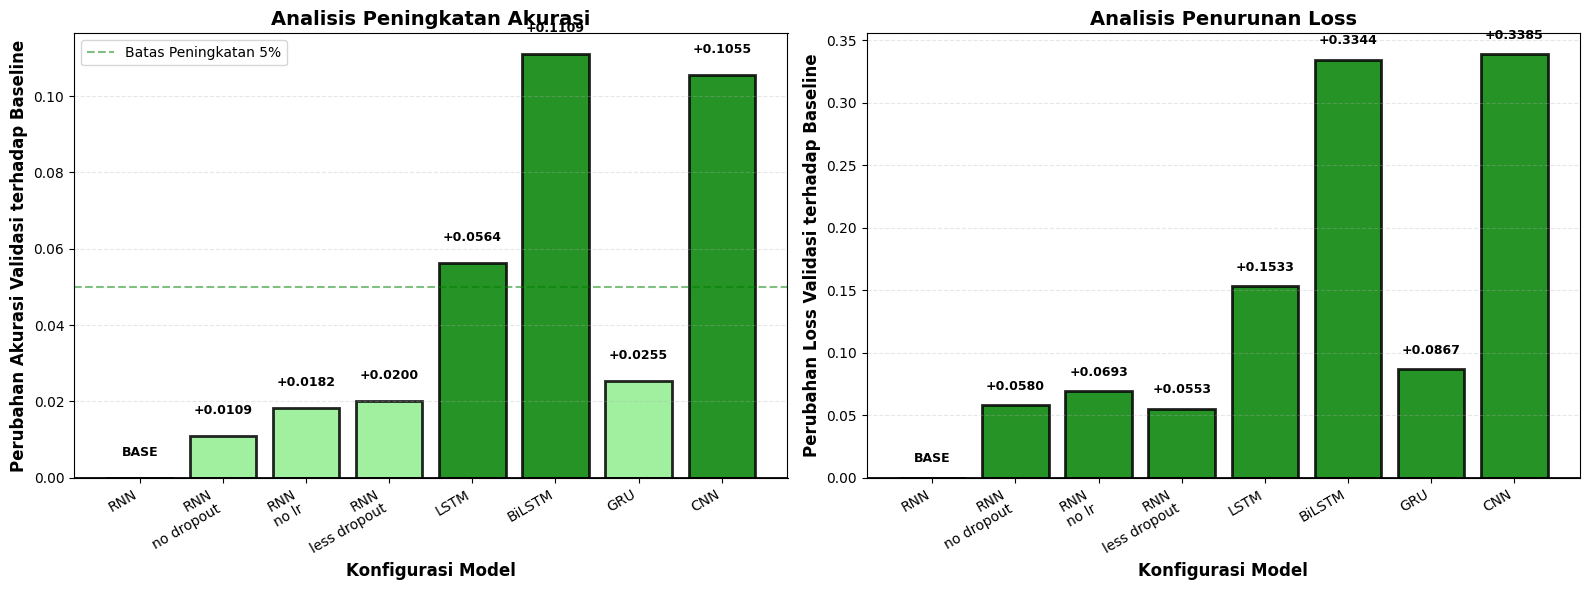

In [45]:
print("\n" + "="*80)
print("Perkembangan Optimisasi Model (Visualisasi)")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# visualisasi peningkatan akurasi dibandingkan baseline
improvements_acc = [v - baseline_acc for v in val_acc]
colors_imp = ['gray' if i == 0 else ('green' if imp > 0.03 else
              ('lightgreen' if imp > 0 else 'red'))
              for i, imp in enumerate(improvements_acc)]

bars1 = axes[0].bar(range(len(models)), improvements_acc, color=colors_imp,
                    edgecolor='black', linewidth=2, alpha=0.85)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=2)
axes[0].axhline(y=0.05, color='green', linestyle='--', linewidth=1.5,
                alpha=0.5, label='Batas Peningkatan 5%')
axes[0].set_xlabel('Konfigurasi Model', fontsize=12, weight='bold')
axes[0].set_ylabel('Perubahan Akurasi Validasi terhadap Baseline', fontsize=12, weight='bold')
axes[0].set_title('Analisis Peningkatan Akurasi', fontsize=14, weight='bold')
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=30, ha='right', fontsize=10)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].legend(fontsize=10)

# nampilin nilai perubahan akurasi di atas tiap bar
for i, (bar, imp) in enumerate(zip(bars1, improvements_acc)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 height + (0.005 if height >= 0 else -0.005),
                 f'{imp:+.4f}' if i > 0 else 'BASE',
                 ha='center',
                 va='bottom' if height >= 0 else 'top',
                 fontsize=9, weight='bold')

# visualisasi perubahan loss dibandingkan baseline
improvements_loss = [baseline_loss - v for v in val_loss]
colors_loss = ['gray' if i == 0 else ('green' if imp > 0.05 else
               ('lightgreen' if imp > 0 else 'red'))
               for i, imp in enumerate(improvements_loss)]

bars2 = axes[1].bar(range(len(models)), improvements_loss, color=colors_loss,
                    edgecolor='black', linewidth=2, alpha=0.85)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=2)
axes[1].set_xlabel('Konfigurasi Model', fontsize=12, weight='bold')
axes[1].set_ylabel('Perubahan Loss Validasi terhadap Baseline', fontsize=12, weight='bold')
axes[1].set_title('Analisis Penurunan Loss', fontsize=14, weight='bold')
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=30, ha='right', fontsize=10)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# nampilin nilai perubahan loss di atas tiap bar
for i, (bar, imp) in enumerate(zip(bars2, improvements_loss)):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 height + (0.01 if height >= 0 else -0.01),
                 f'{imp:+.4f}' if i > 0 else 'BASE',
                 ha='center',
                 va='bottom' if height >= 0 else 'top',
                 fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

In [46]:
print("\n" + "="*80)
print("Kesimpulan Proyek Deep Learning")
print("="*80)

# ringkasan dataset
print("\nRINGKASAN DATASET:")
print(f"Total Email           : {len(df_csv)}")
print(f"Email Spam            : {len(df_csv[df_csv['label']==1])} ({len(df_csv[df_csv['label']==1])/len(df_csv)*100:.2f}%)")
print(f"Email Ham             : {len(df_csv[df_csv['label']==0])} ({len(df_csv[df_csv['label']==0])/len(df_csv)*100:.2f}%)")
print(f"Ukuran Data Train     : {len(X_train_pad)}")
print(f"Ukuran Data Test      : {len(X_test_pad)}")
print(f"Panjang Maks Sekuens  : {max_length}")
print("Ukuran Vocabulary     : 10000")

# performa model terbaik berdasarkan akurasi validasinya
best_idx = np.argmax(val_acc)
print("\nPERFORMA MODEL TERBAIK:")
print(f"Model                 : {models[best_idx]}")
print(f"Akurasi Validasi      : {val_acc[best_idx]:.4f} ({val_acc[best_idx]*100:.2f}%)")
print(f"Loss Validasi         : {val_loss[best_idx]:.4f}")
print(f"Akurasi Training      : {train_acc[best_idx]:.4f} ({train_acc[best_idx]*100:.2f}%)")
print(f"Gap Train vs Validasi : {(train_acc[best_idx] - val_acc[best_idx]):.4f}")

# strategi optimisasi terbaik
best_opt_idx = np.argmax(improvements_acc[1:]) + 1
print("\nSTRATEGI OPTIMISASI TERBAIK:")
print(f"Konfigurasi           : {models[best_opt_idx]}")
print(f"Peningkatan Akurasi   : +{improvements_acc[best_opt_idx]:.4f} ({improvements_acc[best_opt_idx]*100:.2f}%)")
print(f"Catatan Konfigurasi   : {optimization_configs[best_opt_idx]['desc']}")



Kesimpulan Proyek Deep Learning

RINGKASAN DATASET:
Total Email           : 2747
Email Spam            : 372 (13.54%)
Email Ham             : 2375 (86.46%)
Ukuran Data Train     : 2197
Ukuran Data Test      : 550
Panjang Maks Sekuens  : 200
Ukuran Vocabulary     : 10000

PERFORMA MODEL TERBAIK:
Model                 : BiLSTM
Akurasi Validasi      : 0.9709 (97.09%)
Loss Validasi         : 0.0969
Akurasi Training      : 0.9964 (99.64%)
Gap Train vs Validasi : 0.0254

STRATEGI OPTIMISASI TERBAIK:
Konfigurasi           : BiLSTM
Peningkatan Akurasi   : +0.1109 (11.09%)
Catatan Konfigurasi   : Bidirectional LSTM dengan 100 unit


----

## <div align="center"> Reflection </div>

## Main Findings:
Berdasarkan hasil yang kami dapatkan dapat diambil kesimpulan bahwa tingkat akurasi pelatihan dan validasi tertinggi diperoleh oleh model BILSTM dan CNN. Kesimpulan ini kami ambil karena selama proses analisis, setiap anggota kelompok memperoleh hasil yang bervariasi, namun secara konsisten menunjukkan bahwa kedua model tersebut memiliki performa terbaik. Meskipun terdapat perbedaan hasil antar anggota, BILSTM dan CNN tetap muncul sebagai clear winner diantara model-model yang lain dengan selisih akurasi yang tidak signifikan antara keduanya. Dengan adanya hasil ini dapat membantu kami dalam pelaksanaan proyek ini selanjutnya.

## beberapa tantangan yang kami alami:
- Terjadinya Data Imbalance dan Representasi Kategori

Meskipun dataset yang menyediakan tiga kategori (spam, easy ham, hard ham), memberikan distribusi data yang tidak seimbang antar kategori dapat mempengaruhi kinerja model. Hard ham yang relatif sedikit dibandingkan dengan easy ham mungkin tidak memberikan cukup contoh untuk melatih model dalam membedakan email yang benar-benar ambigu. Hal ini berpotensi menyebabkan model kurang robust dalam menangani false positive, yang merupakan aspek kritikal dalam sistem deteksi spam praktis.

- Kompleksitas Pemrosesan Email Struktur

Proses ekstraksi dan pembersihan data email menghadapi tantangan teknis yang signifikan. Perbedaan format encoding, struktur email yang heterogen, dan adanya lampiran yang kompleks memerlukan pra-pemrosesan yang cermat. Ketidakkonsistenan dalam proses ekstraksi fitur, seperti metadata pengirim, metadata penerima, dan isi pesan, dapat menimbulkan noise dalam dataset, yang pada akhirnya mempengaruhi kualitas fitur yang digunakan untuk pelatihan model.

- Missing Values dan Permasalahan dalam Data Qualitas

Terdapat 81 nilai kosong pada kolom ‘penerima’ dan potensi ketidaklengkapan data lainnya memerlukan strategi penanganan yang tepat. Meskipun mitigasi telah dilakukan dengan mengisi nilai default, ketidaklengkapan data dapat mengurangi kualitas dataset dan mempengaruhi kemampuan model untuk mempelajari pola yang konsisten.


## how our EDA results will guide into the next step:Building neural network model
Dengan analisis ini, kami belajar bahwa pemilihan arsitektur jaringan sangat berpengaruh terhadap kemampuan model dalam melakukan generalisasi. Misalnya, model RNN cenderung memiliki fluktuasi akurasi yang lebih besar dan konvergensi yang lebih lambat, sedangkan CNN dan BiLSTM lebih stabil serta efisien dalam proses pelatihan. Dari hasil ini, kami dapat menentukan bahwa penggunaan lapisan konvolusional atau mekanisme dua arah (bidirectional) sangat membantu dalam menangkap konteks data teks yang kompleks seperti pada email spam.

Dengan memahami hasil visualisasi ini, kami jadi lebih mampu menyesuaikan hyperparameter serta memilih struktur model yang tepat untuk meningkatkan performa. Refleksi dari percobaan ini membantu kami membangun neural network yang lebih optimal, tidak hanya berdasarkan teori, tetapi juga berdasarkan bukti empiris dari hasil pelatihan dan validasi yang telah dilakukan.


----

----

## <div align="center"> Reference </div>

### Input Your Reference Here  (If any):

----